In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

In [2]:
import_data = pd.read_excel ('monthly import amount1.xlsx')
import_data

,0,1,2,3,4,5,6,7,8,9,...,146,147,148,149,150,151,152,153,154,155
0,2007-01-01 00:00:00,2007-02-01 00:00:00,2007-03-01 00:00:00,2007-04-01 00:00:00,2007-05-01 00:00:00,2007-06-01 00:00:00,2007-07-01 00:00:00,2007-08-01 00:00:00,2007-09-01 00:00:00,2007-10-01 00:00:00,...,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00
1,32224562,32242267,37580303,34869515,35548764,34407253,32246446,34833597,33163668,35329980,...,53547292,52060147,54210207,50668652,49910283,51815887,49366806,51827652,47939304,45670220


In [3]:
import_data = import_data.transpose()


In [4]:
import_data.columns = ['ds','y']
import_data

,ds,y
0,2007-01-01,32224562
1,2007-02-01,32242267
2,2007-03-01,37580303
3,2007-04-01,34869515
4,2007-05-01,35548764
...,...,...
151,2019-08-01,51815887
152,2019-09-01,49366806
153,2019-10-01,51827652
154,2019-11-01,47939304


In [5]:
import_data.dtypes

ds    datetime64[ns]
y             object
dtype: object

In [6]:
import_data['y'] = import_data['y'].astype(int)

In [7]:
import_data.dtypes

ds    datetime64[ns]
y              int32
dtype: object

In [8]:
from chronos import Chronos
import chronos_plotting

Employing Maximum A Posteriori
100.0% - ELBO loss: -1.4359 | Mean Absolute Error: 886648.1875                                      


C:\Users\omran\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


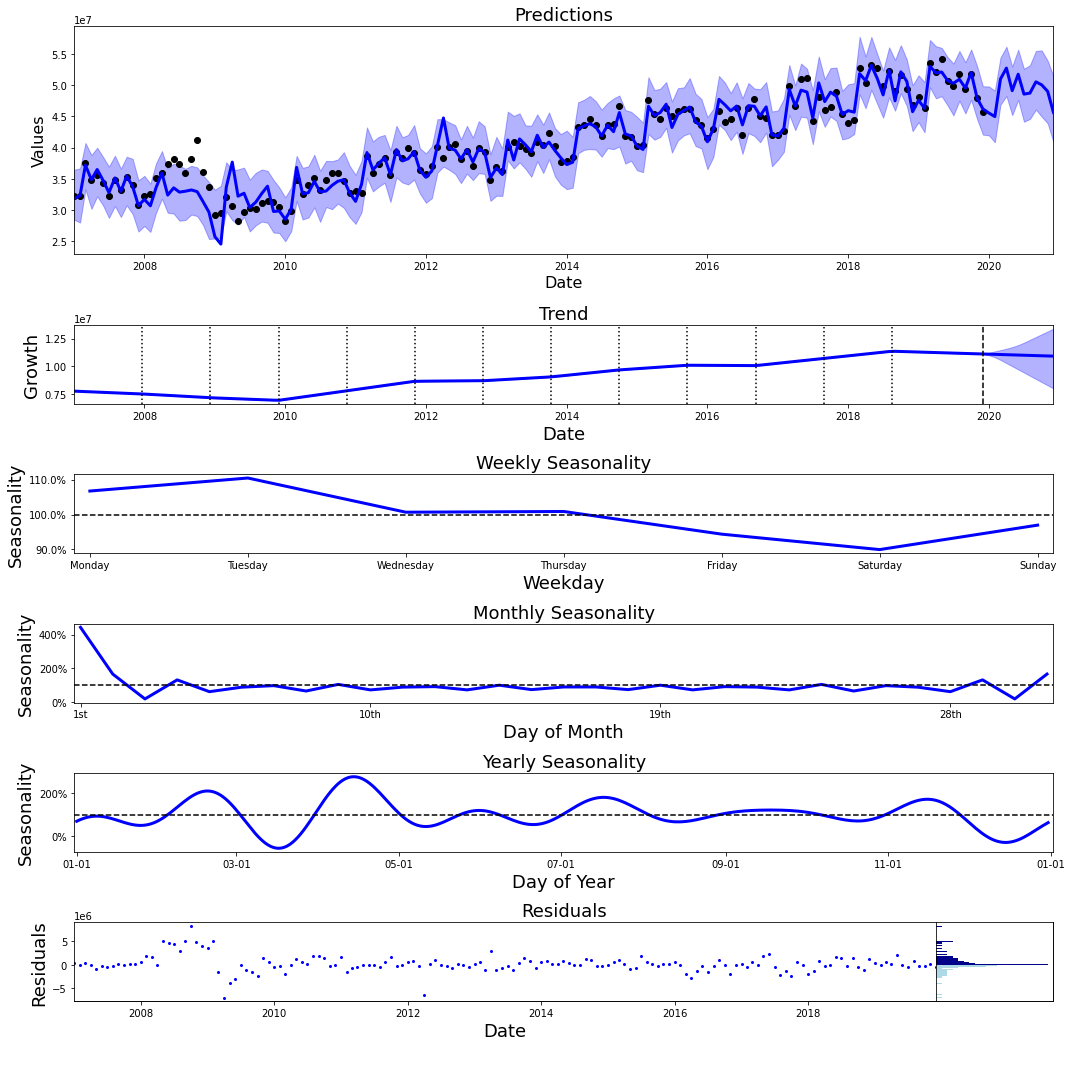

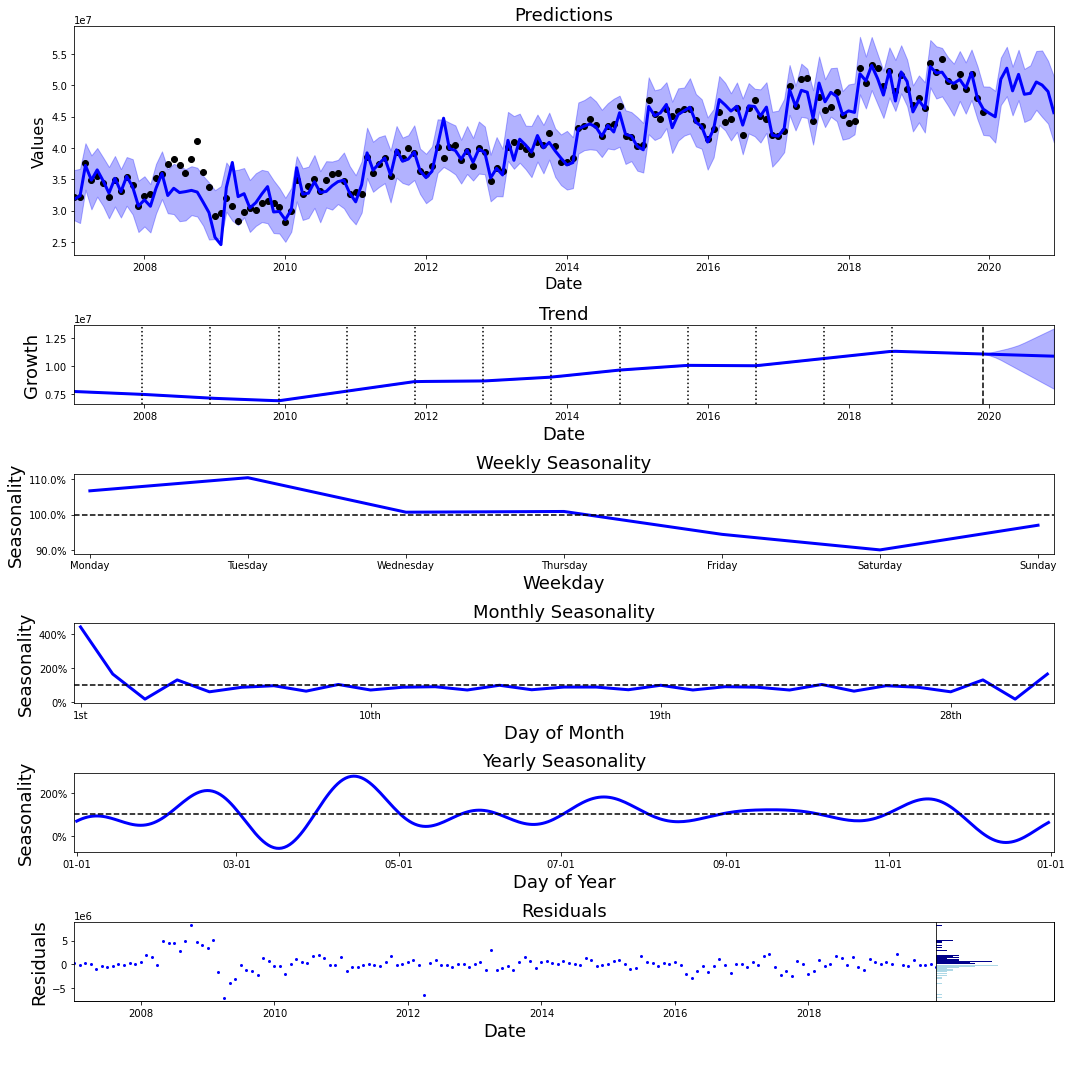

In [9]:
my_chronos = Chronos(n_changepoints=12, year_seasonality_order=8, month_seasonality_order=12,
                     weekly_seasonality_order=4, learning_rate=0.2, changepoint_range=0.9, 
                     seasonality_mode="mul", distribution="StudentT", max_iter=17500)

my_chronos.fit(import_data)
predictions = my_chronos.predict(frequency='MS', sample_number=4000, period=12)

chronos_plotting.plot_components(predictions, my_chronos)

In [10]:
predictions.tail(12)

,ds,y,yhat,yhat_upper,yhat_lower,trend,trend_upper,trend_lower
156,2020-01-01,NaN,4.551924e+07,4.976814e+07,4.195003e+07,1.108731e+07,1.122380e+07,1.099337e+07
157,2020-02-01,NaN,4.495121e+07,4.909450e+07,4.084325e+07,1.107065e+07,1.134623e+07,1.081109e+07
158,2020-03-01,NaN,5.094383e+07,5.438178e+07,4.683108e+07,1.105539e+07,1.146249e+07,1.057623e+07
159,2020-04-01,NaN,5.270068e+07,5.612027e+07,4.822906e+07,1.103928e+07,1.158678e+07,1.028587e+07
160,2020-05-01,NaN,4.908990e+07,5.294645e+07,4.517395e+07,1.102396e+07,1.173253e+07,1.000488e+07
161,2020-06-01,NaN,5.171812e+07,5.564274e+07,4.760566e+07,1.100837e+07,1.190880e+07,9.714517e+06
162,2020-07-01,NaN,4.854162e+07,5.258528e+07,4.412936e+07,1.099333e+07,1.213444e+07,9.433527e+06
163,2020-08-01,NaN,4.869808e+07,5.316246e+07,4.457301e+07,1.097795e+07,1.238987e+07,9.143170e+06
164,2020-09-01,NaN,5.050703e+07,5.544081e+07,4.606977e+07,1.096267e+07,1.264531e+07,8.852810e+06
165,2020-10-01,NaN,5.001785e+07,5.552828e+07,4.493500e+07,1.094766e+07,1.289250e+07,8.571820e+06


In [11]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [12]:
print("RMSE: ",sqrt(mean_squared_error(import_data['y'].values, predictions['yhat'].iloc[0:156].values))/10000000)

RMSE:  0.17857415586292047


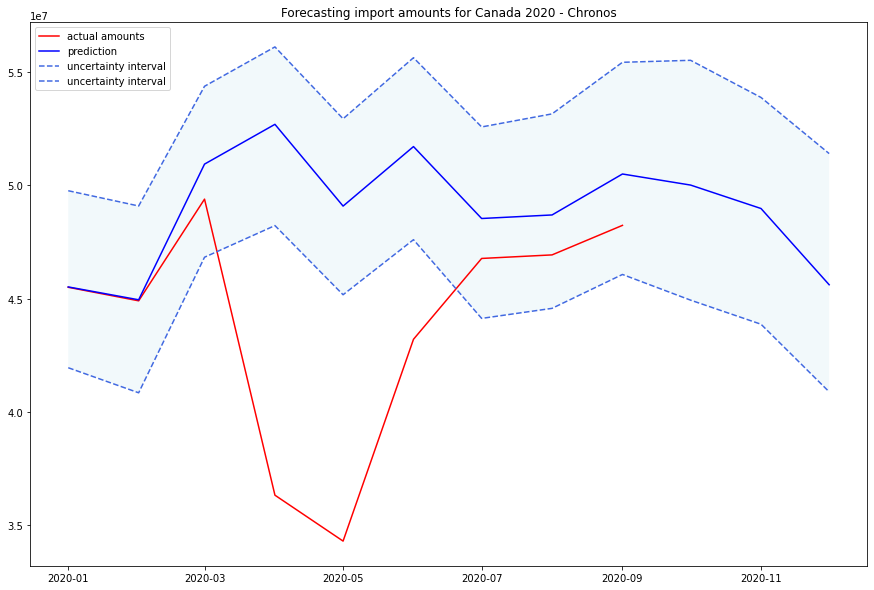

In [13]:
updated = [4.5503505e+07, 4.4905848e+07, 4.9396775e+07, 3.6320973e+07, 3.4293596e+07, 4.3207011e+07, 4.6777035e+07, 
          4.6933967e+07, 4.8238638e+07]


plt.figure(figsize=(15,10))

plt.plot(predictions['ds'].iloc[156:165], updated, c="red", label="actual amounts" )
plt.plot(predictions['ds'].iloc[156:], predictions['yhat'].iloc[156:].values, c="blue", label="prediction")
plt.plot(predictions['ds'].iloc[156:], predictions['yhat_lower'].iloc[156:].values, c="royalblue", label="uncertainty interval", linestyle='--')
plt.plot(predictions['ds'].iloc[156:], predictions['yhat_upper'].iloc[156:].values, c="royalblue", label="uncertainty interval", linestyle='--')
plt.title("Forecasting import amounts for Canada 2020 - Chronos")
ax = plt.gca()
ax.fill_between(predictions['ds'].iloc[156:],  predictions['yhat_lower'].iloc[156:], predictions['yhat_upper'].iloc[156:],
                facecolor='lightblue', alpha=0.15, interpolate=True)
plt.legend()
plt.show();